#### Prepare

In [ ]:
# Import packages
library("microbiome")
library("phyloseq")
library("dplyr")
library("tidyverse")

In [3]:
# Import data
data(atlas1006)

pseq <- atlas1006 %>%
          subset_samples(DNA_extraction_method == "r") %>%
          aggregate_taxa(level = "Phylum") %>%  
          microbiome::transform(transform = "compositional")

head(otu_table(pseq))
head(sample_data(pseq))
head(tax_table(pseq))

,Sample-27,Sample-28,Sample-29,Sample-30,Sample-31,Sample-32,Sample-39,Sample-40,Sample-41,Sample-42,⋯,Sample-1162,Sample-1163,Sample-1165,Sample-1166,Sample-1167,Sample-1168,Sample-1169,Sample-1170,Sample-1171,Sample-1172
Actinobacteria,0.1039880223,0.027911785,0.0837707787,0.3355538342,0.0818457802,0.0601659751,0.0293249360,0.1136334488,0.1463480129,0.1008284024,⋯,0.0068272575,0.1076067843,0.0030205258,0.0363893437,0.0097077352,0.0185519003,0.0051343106,0.0230136282,0.0033783784,0.0364775652
Bacteroidetes,0.4450796243,0.675258442,0.0563210849,0.0176607281,0.0545233758,0.0468533887,0.0592403070,0.0464281134,0.0425617615,0.2642603550,⋯,0.0538451630,0.3001304668,0.2904510194,0.0154784938,0.0186925540,0.0787141355,0.0991889277,0.2069940859,0.1401033386,0.0268546492
Cyanobacteria,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
Firmicutes,0.4385463454,0.292005513,0.8508311461,0.6317583269,0.8440801457,0.8832411249,0.6016532179,0.8313453893,0.6973684211,0.6223668639,⋯,0.9277985315,0.5876113223,0.6767350862,0.9408394106,0.9639574512,0.8911671924,0.8903936305,0.7643353047,0.7959062003,0.9272686584
Fusobacteria,0.0006805499,0.000275672,0.0005468066,0.0007745933,0.0006071645,0.0002881512,0.0003936233,0.0006412723,0.0005370569,0.0004733728,⋯,0.0003220404,0.0002268989,0.0002745933,0.0002976633,0.0004130951,0.0003755445,0.0002976412,0.0003214194,0.0003974563,0.0004475775
Proteobacteria,0.0100721383,0.003928325,0.0060148731,0.0091402014,0.0082574378,0.0068003688,0.3065341468,0.0061562139,0.0161117078,0.0074556213,⋯,0.0069560737,0.0029496852,0.0057664584,0.0036463759,0.0047505938,0.0070602373,0.0031996428,0.0038570327,0.0069554849,0.0052590355


,age,sex,nationality,DNA_extraction_method,project,diversity,bmi_group,subject,time,sample
,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<chr>
Sample-27,33,male,CentralEurope,r,2,5.53,severeobese,27,0,Sample-27
Sample-28,39,male,CentralEurope,r,2,5.87,severeobese,28,0,Sample-28
Sample-29,36,male,CentralEurope,r,2,5.70,severeobese,29,0,Sample-29
Sample-30,50,male,CentralEurope,r,2,5.59,severeobese,30,0,Sample-30
Sample-31,54,male,CentralEurope,r,2,5.87,severeobese,31,0,Sample-31
Sample-32,54,male,CentralEurope,r,2,6.12,obese,32,0,Sample-32


,Phylum,unique
Actinobacteria,Actinobacteria,Actinobacteria
Bacteroidetes,Bacteroidetes,Bacteroidetes
Cyanobacteria,Cyanobacteria,Cyanobacteria
Firmicutes,Firmicutes,Firmicutes
Fusobacteria,Fusobacteria,Fusobacteria
Proteobacteria,Proteobacteria,Proteobacteria


#### Composition barplots

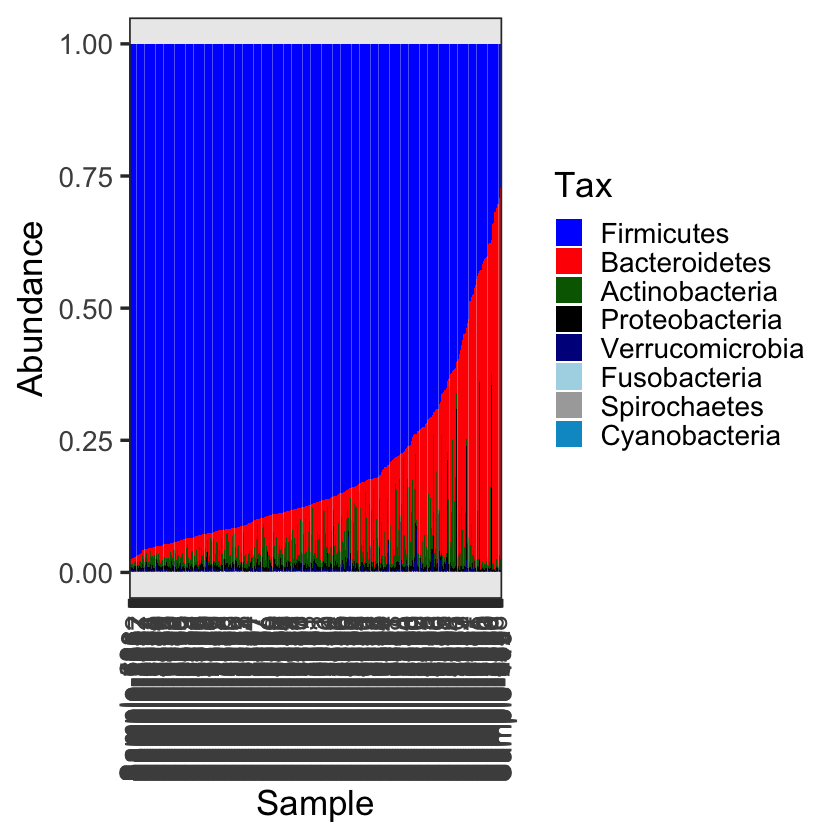

In [39]:
# Sort the axis
theme_set(theme_bw(21))
p <- pseq %>%
    plot_composition(sample.sort = "Firmicutes", otu.sort = "abundance") + 
          scale_fill_manual(values = default_colors("Phylum")[taxa(pseq3)]) 

print(p)

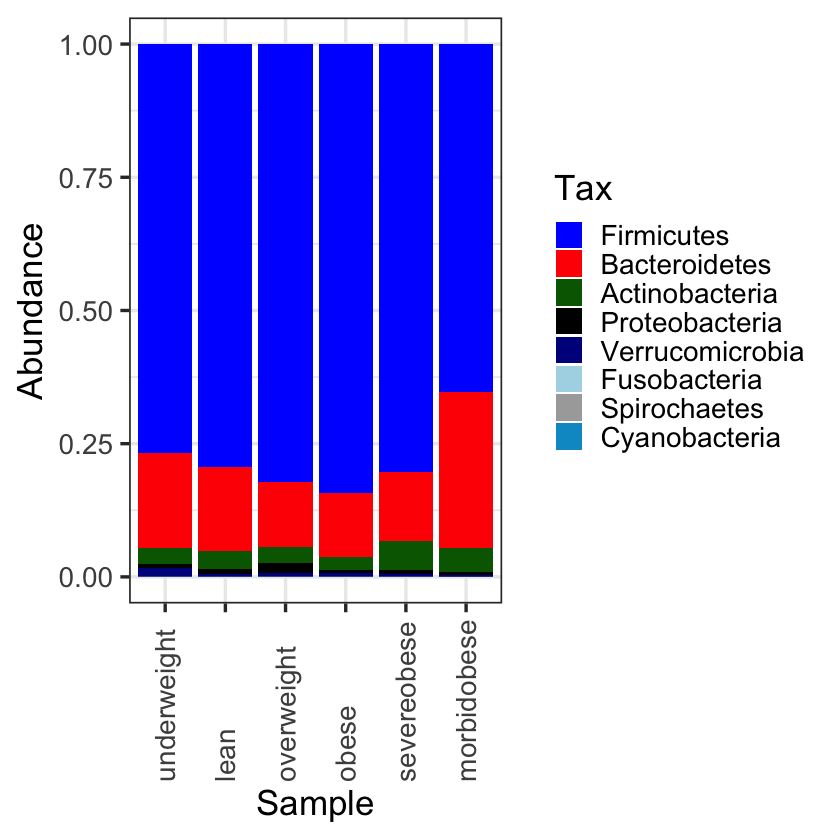

In [40]:
# Averaged by group
theme_set(theme_bw(21))
p <- pseq %>%
    plot_composition(sample.sort = "Firmicutes", otu.sort = "abundance", average_by = "bmi_group") +
          scale_fill_manual(values = default_colors("Phylum")[taxa(pseq3)]) 

print(p)

#### Composition heatmaps

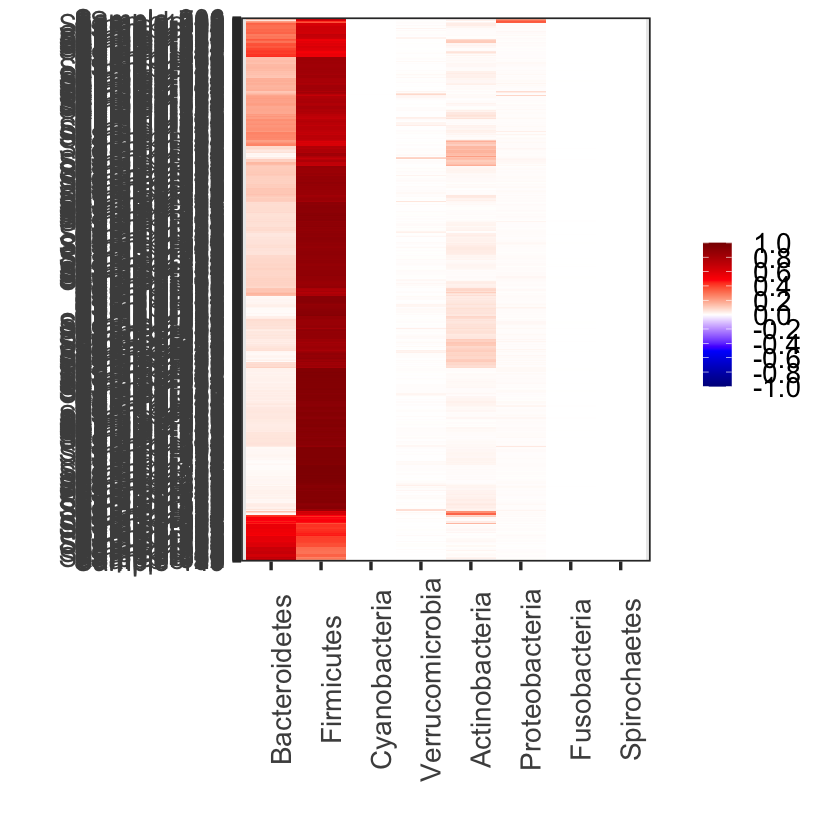

In [41]:
p <- plot_composition(microbiome::transform(pseq, "compositional"),
                    plot.type = "heatmap")

print(p)